## 1️⃣ Analyse des données

### Tâches
1. Examiner la structure du dataset.
2. Détecter et traiter les valeurs manquantes et doublons.
3. Analyser la distribution de la variable cible.
4. Générer des WordClouds.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ramas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### 1. Chargement et Inspection des données

In [31]:
df = pd.read_csv('../data/raw/DataSet_Emails.csv')

df.shape

(31716, 8)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31716 entries, 0 to 31715
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31716 non-null  int64 
 1   message_id  31716 non-null  int64 
 2   text        31665 non-null  object
 3   label       31716 non-null  int64 
 4   label_text  31716 non-null  object
 5   subject     31442 non-null  object
 6   message     31371 non-null  object
 7   date        31716 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.9+ MB


In [33]:
print(f"Dimensions du dataset : {df.shape}")

Dimensions du dataset : (31716, 8)


### 2. Nettoyage des données (Valeurs manquantes et Doublons)

In [34]:
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

Valeurs manquantes par colonne :
Unnamed: 0      0
message_id      0
text           51
label           0
label_text      0
subject       274
message       345
date            0
dtype: int64


In [35]:

# df = df.dropna(subset=['text_column_name'])
df = df.dropna()

In [36]:
# Vérification des doublons
doublons = df.duplicated().sum()
print(f"Nombre de doublons : {doublons}")

Nombre de doublons : 0


In [37]:
# Suppression des doublons
df = df.drop_duplicates()
print(f"Dimensions après suppression des doublons : {df.shape}")

Dimensions après suppression des doublons : (31148, 8)


### 3. Analyse de la distribution (Spam vs Ham)

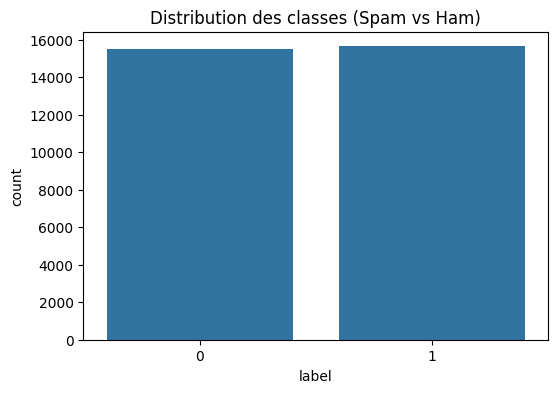

label
1    0.502279
0    0.497721
Name: proportion, dtype: float64


In [38]:
# Visualisation de la distribution
target_col = 'label'

plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df)
plt.title('Distribution des classes (Spam vs Ham)')
plt.show()

print(df[target_col].value_counts(normalize=True))

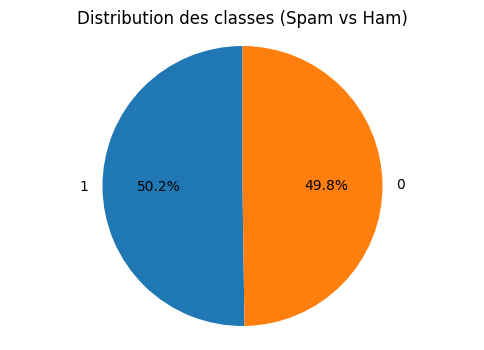

label
1    0.502279
0    0.497721
Name: proportion, dtype: float64


In [39]:

counts = df[target_col].value_counts()
labels = counts.index
sizes = counts.values

plt.figure(figsize=(6, 4))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution des classes (Spam vs Ham)')
plt.axis('equal')
plt.show()

print(df[target_col].value_counts(normalize=True))

In [40]:
# les colonnes : 
print(df.columns)
df.head(5)

Index(['Unnamed: 0', 'message_id', 'text', 'label', 'label_text', 'subject',
       'message', 'date'],
      dtype='object')


,Unnamed: 0,message_id,text,label,label_text,subject,message,date
0,0,33214,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18
1,1,11929,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19
2,2,19784,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11
3,3,2209,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12
4,4,15880,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13


### 4. WordClouds

In [41]:
# # Fonction pour générer un WordCloud
# def plot_wordcloud(text, title):
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis('off')
#     plt.title(title)
#     plt.show()


# spam_text = " ".join(df[df['label_text'] == 'spam']['text'].astype(str).tolist())
# ham_text = " ".join(df[df['label_text'] == 'ham']['text'].astype(str).tolist())

# # WordCloud Spam
# plot_wordcloud(spam_text, "WordCloud - Spam")

# # WordCloud Ham
# plot_wordcloud(ham_text, "WordCloud - Ham")

## 2️⃣ Prétraitement du texte

### Tâches
1. Nettoyage et normalisation du texte
2. Tokenisation et filtrage des mots
3. Vectorisation du texte


### 1. Nettoyage et normalisation du texte

#### ➕ Convertir tout le texte en minuscules

In [42]:
#
df['text'] = df['text'].str.lower().str.strip()
# df['subject'] = df['subject'].str.lower().str.strip()

#### ➕ Supprimer les lignes vides ou incomplètes

In [43]:
df.isnull().sum()

Unnamed: 0    0
message_id    0
text          0
label         0
label_text    0
subject       0
message       0
date          0
dtype: int64

In [44]:
df = df.dropna(subset=["text"])

df["text"] = df["text"].str.strip()

df = df[df["text"] != ""]

df.shape

(31148, 8)

#### ➕ Supprimer la ponctuation et les caractères spéciaux

In [54]:
df = df.drop(columns=['Unnamed: 0', 'message_id', 'subject', 'message', 'date'])

In [55]:
df.shape

(31145, 6)

In [56]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # URLs
    text = re.sub(r'\S+@\S+', '', text)  # emails
    text = re.sub(r'\d+', '', text)  # chiffres
    text = text.translate(str.maketrans('', '', string.punctuation))  # ponctuation
    text = re.sub(r'\s+', ' ', text).strip()
    return text


df['text'] = df['text'].apply(clean_text)

df.head(5)


,text,label,label_text,text_tokenized,text_no_stopwords,text_stemmed
0,any software just for understanding oem softwa...,1,spam,"[any, software, just, for, understanding, oem,...","[software, understanding, oem, software, lead,...","[softwar, understand, oem, softwar, lead, temp..."
1,perspective on ferc regulatory action client c...,0,ham,"[perspective, on, ferc, regulatory, action, cl...","[perspective, ferc, regulatory, action, client...","[perspect, ferc, regulatori, action, client, c..."
2,wanted to try ci lis but thought it was way to...,1,spam,"[wanted, to, try, ci, lis, but, thought, it, w...","[wanted, try, ci, lis, thought, way, expensive...","[want, tri, ci, li, thought, way, expens, viag..."
3,enron hpl actuals for december teco tap enron ...,0,ham,"[enron, hpl, actuals, for, december, teco, tap...","[enron, hpl, actuals, december, teco, tap, enr...","[enron, hpl, actual, decemb, teco, tap, enron,..."
4,looking for cheap high quality software rotate...,1,spam,"[looking, for, cheap, high, quality, software,...","[looking, cheap, high, quality, software, rota...","[look, cheap, high, qualiti, softwar, rotat, n..."


In [57]:
df['text'].isna().sum()

np.int64(0)

In [58]:
df_null = df[(df['text'] == "")]
df = df[df['text'] != ""]
df.shape

(31145, 6)

In [59]:
df_null.head()

,text,label,label_text,text_tokenized,text_no_stopwords,text_stemmed


In [60]:
df.shape


(31145, 6)

### 2. Tokenisation et filtrage des mots

#### ➕ Tokeniser le texte

In [61]:

def tokenize_text(text):
    return word_tokenize(text)

df['text_tokenized'] = df['text'].apply(tokenize_text)
df.head()


,text,label,label_text,text_tokenized,text_no_stopwords,text_stemmed
0,any software just for understanding oem softwa...,1,spam,"[any, software, just, for, understanding, oem,...","[software, understanding, oem, software, lead,...","[softwar, understand, oem, softwar, lead, temp..."
1,perspective on ferc regulatory action client c...,0,ham,"[perspective, on, ferc, regulatory, action, cl...","[perspective, ferc, regulatory, action, client...","[perspect, ferc, regulatori, action, client, c..."
2,wanted to try ci lis but thought it was way to...,1,spam,"[wanted, to, try, ci, lis, but, thought, it, w...","[wanted, try, ci, lis, thought, way, expensive...","[want, tri, ci, li, thought, way, expens, viag..."
3,enron hpl actuals for december teco tap enron ...,0,ham,"[enron, hpl, actuals, for, december, teco, tap...","[enron, hpl, actuals, december, teco, tap, enr...","[enron, hpl, actual, decemb, teco, tap, enron,..."
4,looking for cheap high quality software rotate...,1,spam,"[looking, for, cheap, high, quality, software,...","[looking, cheap, high, quality, software, rota...","[look, cheap, high, qualiti, softwar, rotat, n..."


#### ➕ Supprimer les stopwords

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['text_no_stopwords'] = df['text_tokenized'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label,label_text,text_tokenized,text_no_stopwords,text_stemmed
0,any software just for understanding oem softwa...,1,spam,"[any, software, just, for, understanding, oem,...","[software, understanding, oem, software, lead,...","[softwar, understand, oem, softwar, lead, temp..."
1,perspective on ferc regulatory action client c...,0,ham,"[perspective, on, ferc, regulatory, action, cl...","[perspective, ferc, regulatory, action, client...","[perspect, ferc, regulatori, action, client, c..."
2,wanted to try ci lis but thought it was way to...,1,spam,"[wanted, to, try, ci, lis, but, thought, it, w...","[wanted, try, ci, lis, thought, way, expensive...","[want, tri, ci, li, thought, way, expens, viag..."
3,enron hpl actuals for december teco tap enron ...,0,ham,"[enron, hpl, actuals, for, december, teco, tap...","[enron, hpl, actuals, december, teco, tap, enr...","[enron, hpl, actual, decemb, teco, tap, enron,..."
4,looking for cheap high quality software rotate...,1,spam,"[looking, for, cheap, high, quality, software,...","[looking, cheap, high, quality, software, rota...","[look, cheap, high, qualiti, softwar, rotat, n..."


#### ➕ Appliquer le stemming (PorterStemmer)

In [63]:
stemmer = PorterStemmer()

def stem_text(tokens):
    return [stemmer.stem(word) for word in tokens]

df['text_stemmed'] = df['text_no_stopwords'].apply(stem_text)
df.head()

,text,label,label_text,text_tokenized,text_no_stopwords,text_stemmed
0,any software just for understanding oem softwa...,1,spam,"[any, software, just, for, understanding, oem,...","[software, understanding, oem, software, lead,...","[softwar, understand, oem, softwar, lead, temp..."
1,perspective on ferc regulatory action client c...,0,ham,"[perspective, on, ferc, regulatory, action, cl...","[perspective, ferc, regulatory, action, client...","[perspect, ferc, regulatori, action, client, c..."
2,wanted to try ci lis but thought it was way to...,1,spam,"[wanted, to, try, ci, lis, but, thought, it, w...","[wanted, try, ci, lis, thought, way, expensive...","[want, tri, ci, li, thought, way, expens, viag..."
3,enron hpl actuals for december teco tap enron ...,0,ham,"[enron, hpl, actuals, for, december, teco, tap...","[enron, hpl, actuals, december, teco, tap, enr...","[enron, hpl, actual, decemb, teco, tap, enron,..."
4,looking for cheap high quality software rotate...,1,spam,"[looking, for, cheap, high, quality, software,...","[looking, cheap, high, quality, software, rota...","[look, cheap, high, qualiti, softwar, rotat, n..."


In [69]:
df['text_stemmed'][0]

['softwar',
 'understand',
 'oem',
 'softwar',
 'lead',
 'temptat',
 'find',
 'way',
 'law',
 'disregard',
 'trifl']